<a href="https://colab.research.google.com/github/hkhong72/big_data/blob/main/%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9C%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

In [ ]:
input_data = []
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x): # y가 작다면
            correct_data.append([0, 1])
        else: #크다면
            correct_data.append([1, 0])

In [ ]:
n_data = len(correct_data) #전체데이터갯수 준비
input_data = np.array(input_data)
correct_data = np.array(correct_data)

In [ ]:
n_in = 2 #입력
n_mid = 6 #은닉
n_out = 2 #출력층

In [ ]:
wb_width = 0.01 #전체스케일 줄임
eta = 0.1 #학습률
epoch = 101 #전체에포크, 몇번돌릴것인가, 2000번
interval = 10 #200번에포크돌때마다 정확도하고상태를 찍기위해

In [ ]:
class MiddleLayer: #은닉층
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n) #가중치 파라미터
        self.b = wb_width * np.random.randn( n)
        
    def forward(self, x): # 순전파, 포워드 함수
        self.x = x #일단 저장
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u)) #시그모이드 
        
    def backward(self, grad_y): #역전파
        delta = grad_y * (1 - self.y) * self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta): # eta 학습률
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
#미들레이어는 회귀문제와 동일

In [ ]:
# 출력층 클래스
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)# 가중치(행렬)
        self.b = wb_width * np.random.randn(n)# 편향(벡터)
        
    # 순전파 forward
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b 
        self.y = np.exp(u) / np.sum(np.exp(u), axis=1, keepdims=True) # 소프트맥스
        
    # 역전파 backward
    def backward(self, t):
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta): # 가중치와 편향 수정
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [ ]:
#각층의 객체만듬
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

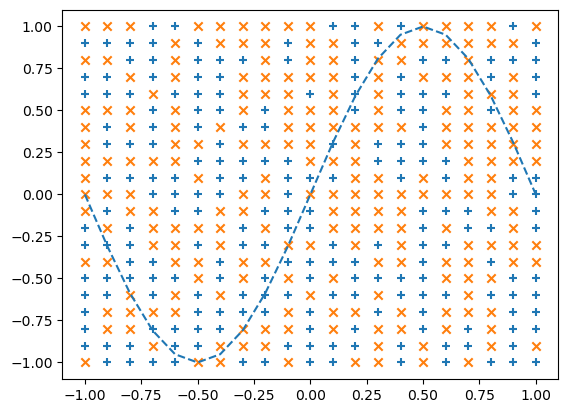

Epoch:0/101 Error:0.7171527377064493


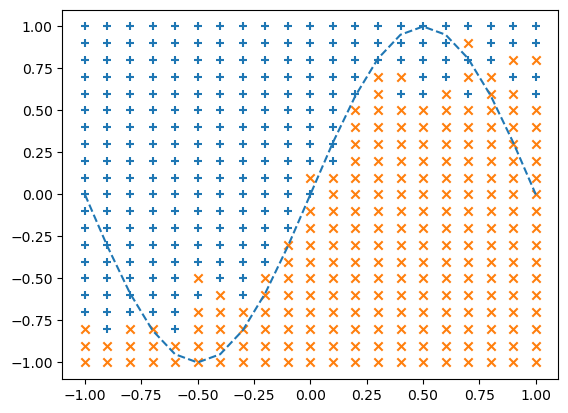

Epoch:10/101 Error:0.3004011454843169


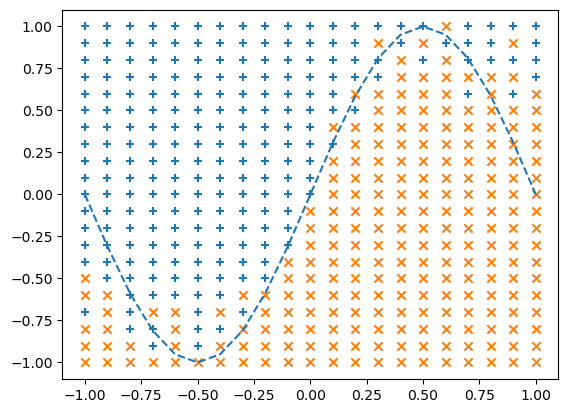

Epoch:20/101 Error:0.21674037529807014


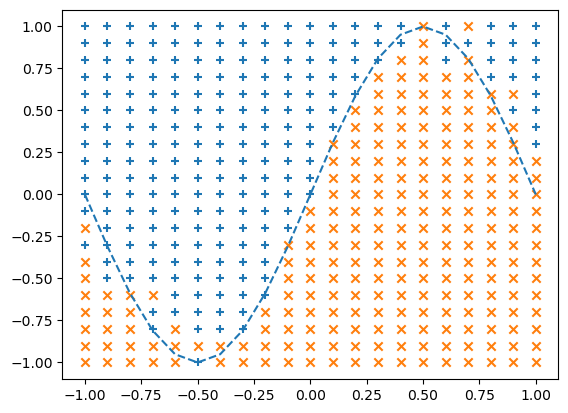

Epoch:30/101 Error:0.16121556553036806


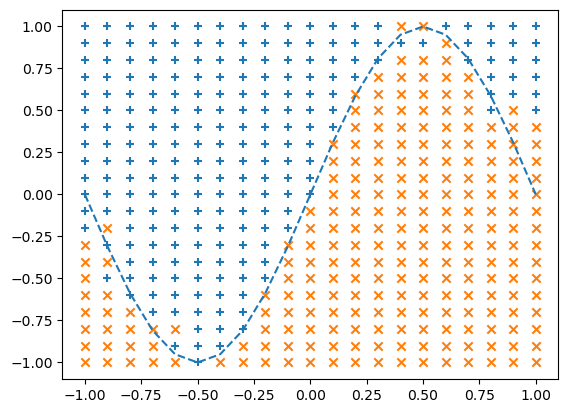

Epoch:40/101 Error:0.13452562331297974


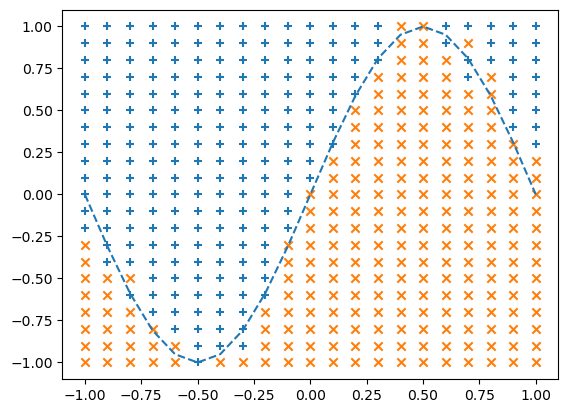

Epoch:50/101 Error:0.1148873826415686


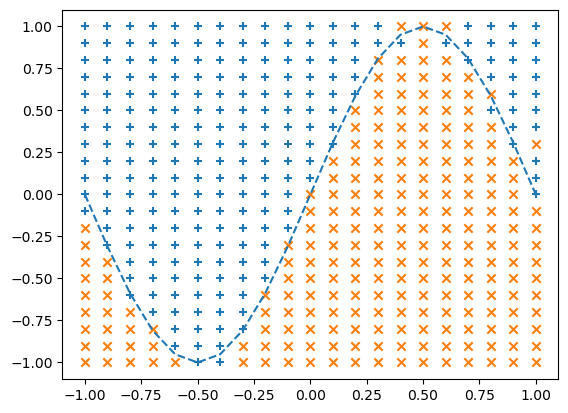

Epoch:60/101 Error:0.09775204494706685


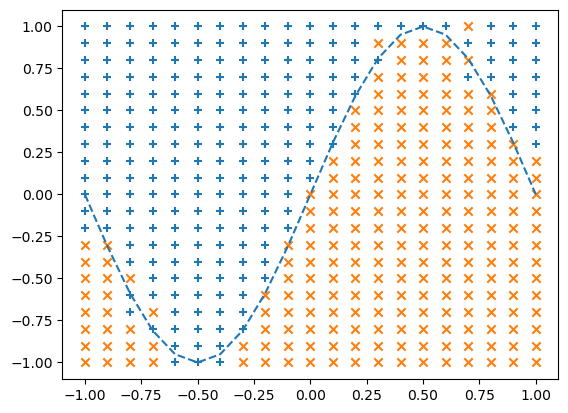

Epoch:70/101 Error:0.09202356939399235


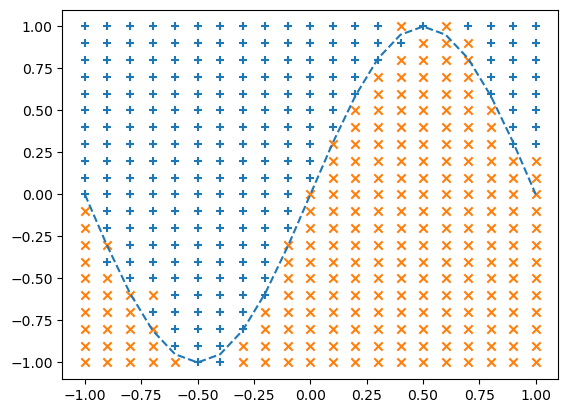

Epoch:80/101 Error:0.0813010293887765


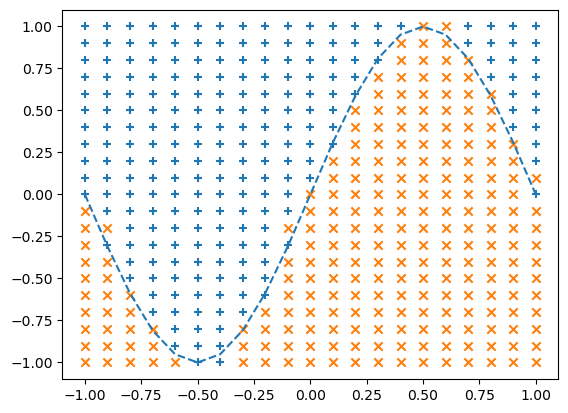

Epoch:90/101 Error:0.07035664636040008


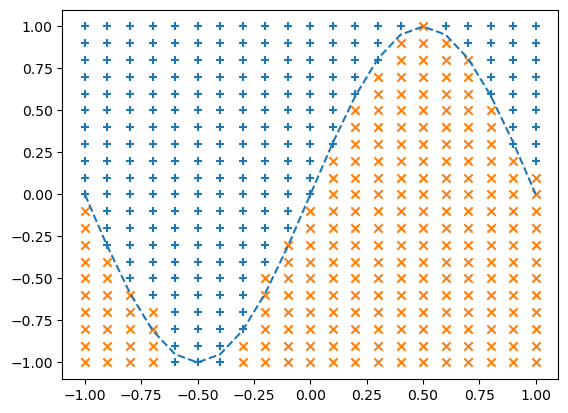

Epoch:100/101 Error:0.07045078430734347


In [ ]:
#학습
sin_data = np.sin(np.pi * X)
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []

    for idx in index_random:
        x = input_data[idx] # 입력
        t = correct_data[idx] # 정답
        
# 순전파
        middle_layer.forward(x.reshape(1, 2)) # 입력을 행렬로 변환
        output_layer.forward(middle_layer.y) 
        
# 역전파
        output_layer.backward(t.reshape(1, 2)) # 정답을 행렬로 변환
        middle_layer.backward(output_layer.grad_x)

# 가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1) # 행렬을 벡터로 되돌림
# 오차계산
            total_error += - np.sum(t * np.log(y + 1e-7))
# 출력 기록
            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])
        
    if i % interval == 0:   
    # 출력 그래프 표시
            plt.plot(X, sin_data, linestyle="dashed")
            plt.scatter(x_1, y_1, marker="+")
            plt.scatter(x_2, y_2, marker="x")
            plt.show()

    # 에포크 수와 오차 표시
            print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))